<a href="https://colab.research.google.com/github/tekunkka/tugaspython/blob/main/Tugas%20Python%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

dataset/  Untitled


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [8]:
for imagePath in imagePaths:
	
	image = Image.open(imagePath)
	image = np.array(image.resize((123, 123))) / 255.0 
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

In [10]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [11]:
print(labels)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [21]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.20, shuffle=True)
print(trainX.shape)
print(testX.shape)

(748, 123, 123, 3)
(188, 123, 123, 3)


In [68]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(123,123,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(1024, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(4096, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 121, 121, 16)      448       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 58, 58, 64)        9280      
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 27, 27, 256)       147712    
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 11, 11, 1024)    

In [69]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
24/24 [==============================] - 189s 8s/step - loss: 2.0873 - accuracy: 0.1043 - val_loss: 2.0822 - val_accuracy: 0.1064
Epoch 2/25
24/24 [==============================] - 189s 8s/step - loss: 2.0793 - accuracy: 0.1176 - val_loss: 2.0816 - val_accuracy: 0.1064
Epoch 3/25
24/24 [==============================] - 188s 8s/step - loss: 2.0810 - accuracy: 0.1297 - val_loss: 2.0837 - val_accuracy: 0.1223
Epoch 4/25
24/24 [==============================] - 185s 8s/step - loss: 2.0752 - accuracy: 0.1457 - val_loss: 2.0555 - val_accuracy: 0.1330
Epoch 5/25
24/24 [==============================] - 183s 8s/step - loss: 2.0684 - accuracy: 0.1364 - val_loss: 2.0668 - val_accuracy: 0.0904
Epoch 6/25
24/24 [==============================] - 183s 8s/step - loss: 1.9854 - accuracy: 0.2152 - val_loss: 1.8740 - val_accuracy: 0.2553
Epoch 7/25
24/24 [==============================] - 185s 8s/step - loss: 1.8441 - accuracy: 0.2527 - val_loss: 1.7301 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


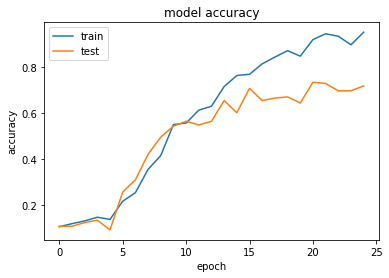

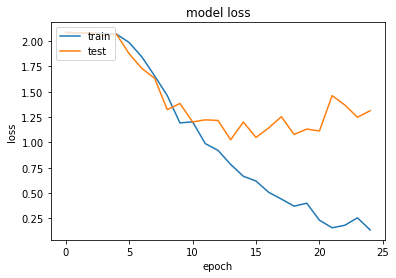

In [70]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.67      0.70      0.68        20
      GMB_02       0.71      0.80      0.75        15
      GMB_03       0.82      0.75      0.78        24
      GMB_04       0.77      0.67      0.71        30
      GMB_05       0.48      0.60      0.53        20
      GMB_07       0.80      0.70      0.74        23
      GMB_08       0.90      0.76      0.83        34
      GMB_10       0.61      0.77      0.68        22

    accuracy                           0.72       188
   macro avg       0.72      0.72      0.71       188
weighted avg       0.74      0.72      0.72       188



In [72]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets
